In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from video_loader import VideoLoader

class MetricVisualizer:
    def __init__(self, metrics_file='full_metrics.pickle', summary_file='video_metrics_summary.csv'):
        # Load the full metrics data
        with open(metrics_file, 'rb') as f:
            self.metrics = pickle.load(f)
        
        # Load the summary statistics
        self.summary_df = pd.read_csv(summary_file)
        
    def find_video_metrics(self, cube, condition, line):
        """Find metrics for a specific video."""
        for m in self.metrics:
            if m['cube'] == cube and m['condition'] == condition and m['line'] == line:
                return m
        return None
    
    def find_video_summary(self, cube, condition, line):
        """Find summary statistics for a specific video."""
        mask = (self.summary_df['cube'] == cube) & \
               (self.summary_df['condition'] == condition) & \
               (self.summary_df['line'] == line)
        return self.summary_df[mask].iloc[0] if mask.any() else None
    
    def visualize_metrics(self, cube, condition, line):
        """Create comprehensive visualization of all metrics for a specific video."""
        metrics = self.find_video_metrics(cube, condition, line)
        summary = self.find_video_summary(cube, condition, line)
        
        if metrics is None or summary is None:
            print(f"No data found for Cube {cube}, Condition {condition}, Line {line}")
            return
            
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 12))
        gs = fig.add_gridspec(3, 3)
        
        # 1. Time series of melt pool areas for all thresholds
        ax1 = fig.add_subplot(gs[0, :])
        thresholds = sorted(metrics['areas'].keys())
        for th in thresholds:
            ax1.plot(metrics['areas'][th], label=f'Threshold {th}')
        ax1.set_title('Melt Pool Area Over Time')
        ax1.set_xlabel('Frame')
        ax1.set_ylabel('Area (pixels)')
        ax1.legend()
        ax1.grid(True)
        
        # 2. Box plots of areas for each threshold
        ax2 = fig.add_subplot(gs[1, 0])
        box_data = [metrics['areas'][th] for th in thresholds]
        ax2.boxplot(box_data, tick_labels=[f'th{th}' for th in thresholds])  # Updated parameter name
        ax2.set_title('Area Distribution by Threshold')
        ax2.set_ylabel('Area (pixels)')
        plt.setp(ax2.xaxis.get_ticklabels(), rotation=45)
        
        # 3. Spatter intensity over time
        ax3 = fig.add_subplot(gs[1, 1:])
        ax3.plot(metrics['spatter_intensity'], color='red')
        ax3.set_title('Spatter Intensity Over Time')
        ax3.set_xlabel('Frame')
        ax3.set_ylabel('Intensity')
        ax3.grid(True)
        
        # 4. Summary statistics table
        ax4 = fig.add_subplot(gs[2, :])
        ax4.axis('tight')
        ax4.axis('off')
        
        # Prepare summary data for table
        table_data = []
        headers = []
        
        # Add area statistics
        for th in thresholds:
            headers.extend([f'Area th{th}\nMean', f'Area th{th}\nStd'])
            table_data.extend([
                f"{summary[f'area_mean_th{th}']:.1f}",
                f"{summary[f'area_std_th{th}']:.1f}"
            ])
        
        # Add spatter statistics
        headers.extend(['Spatter\nMean', 'Spatter\nStd'])
        table_data.extend([
            f"{summary['spatter_mean']:.1f}",
            f"{summary['spatter_std']:.1f}"
        ])
        
        # Create table
        table = ax4.table(
            cellText=[table_data],
            colLabels=headers,
            cellLoc='center',
            loc='center',
            colColours=['#f2f2f2']*len(headers)
        )
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 1.5)
        
        # Add title for the whole figure
        fig.suptitle(f'Metrics for Cube {cube}, Condition {condition}, Line {line}', 
                    fontsize=16, y=1.05)
        
        plt.tight_layout()
        return fig


In [24]:
visualizer = MetricVisualizer()


In [25]:
def show_video_metrics(cube, condition, line):
    """Convenience function to show metrics for a specific video."""
    fig = visualizer.visualize_metrics(cube, condition, line)
    if fig:
        plt.show()
    

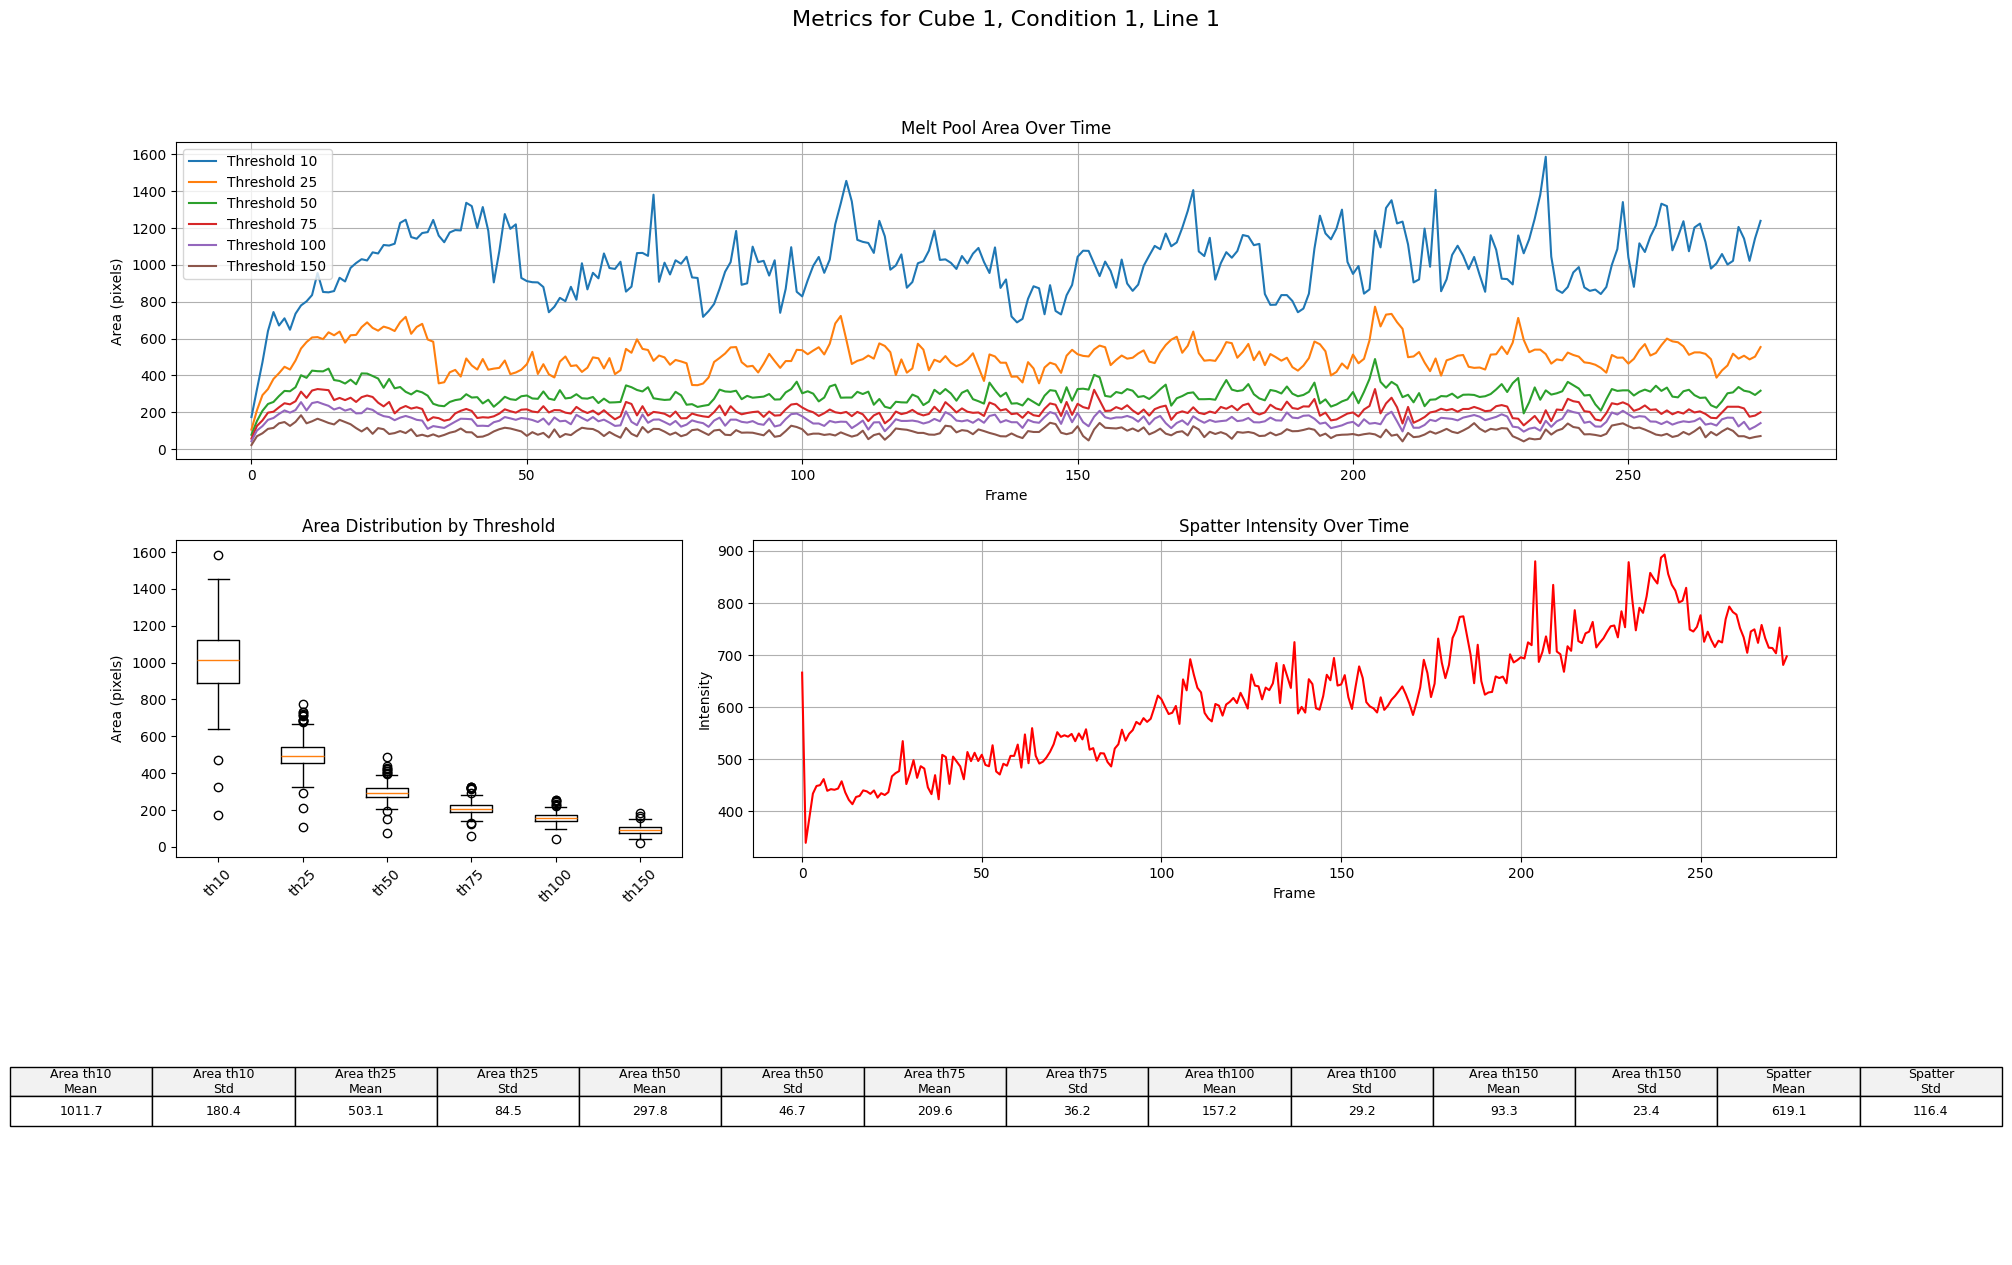

In [26]:
show_video_metrics(cube=1, condition=1, line=1)

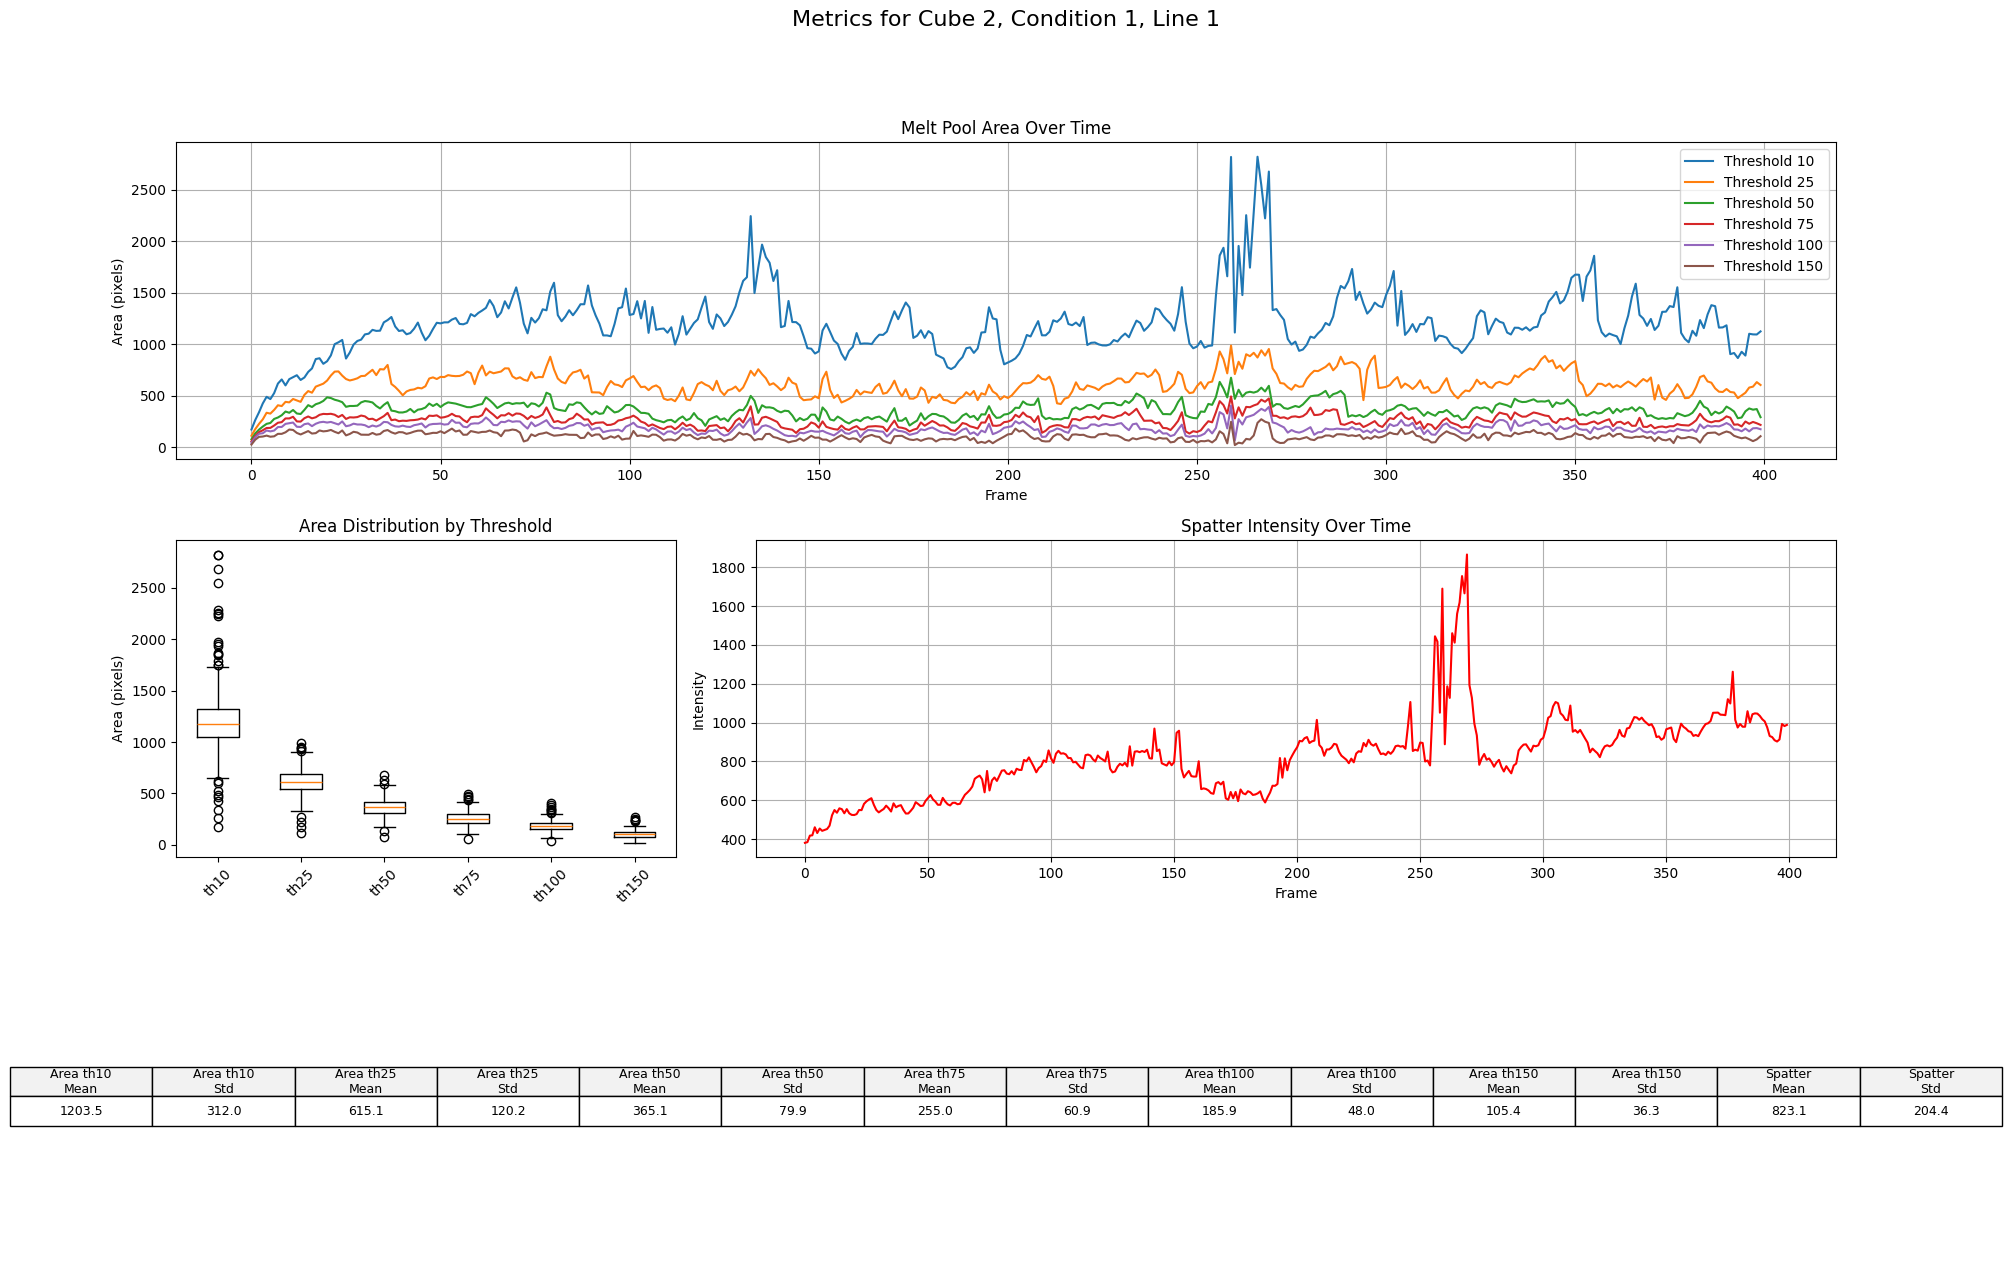

In [27]:
show_video_metrics(cube=2, condition=1, line=1)

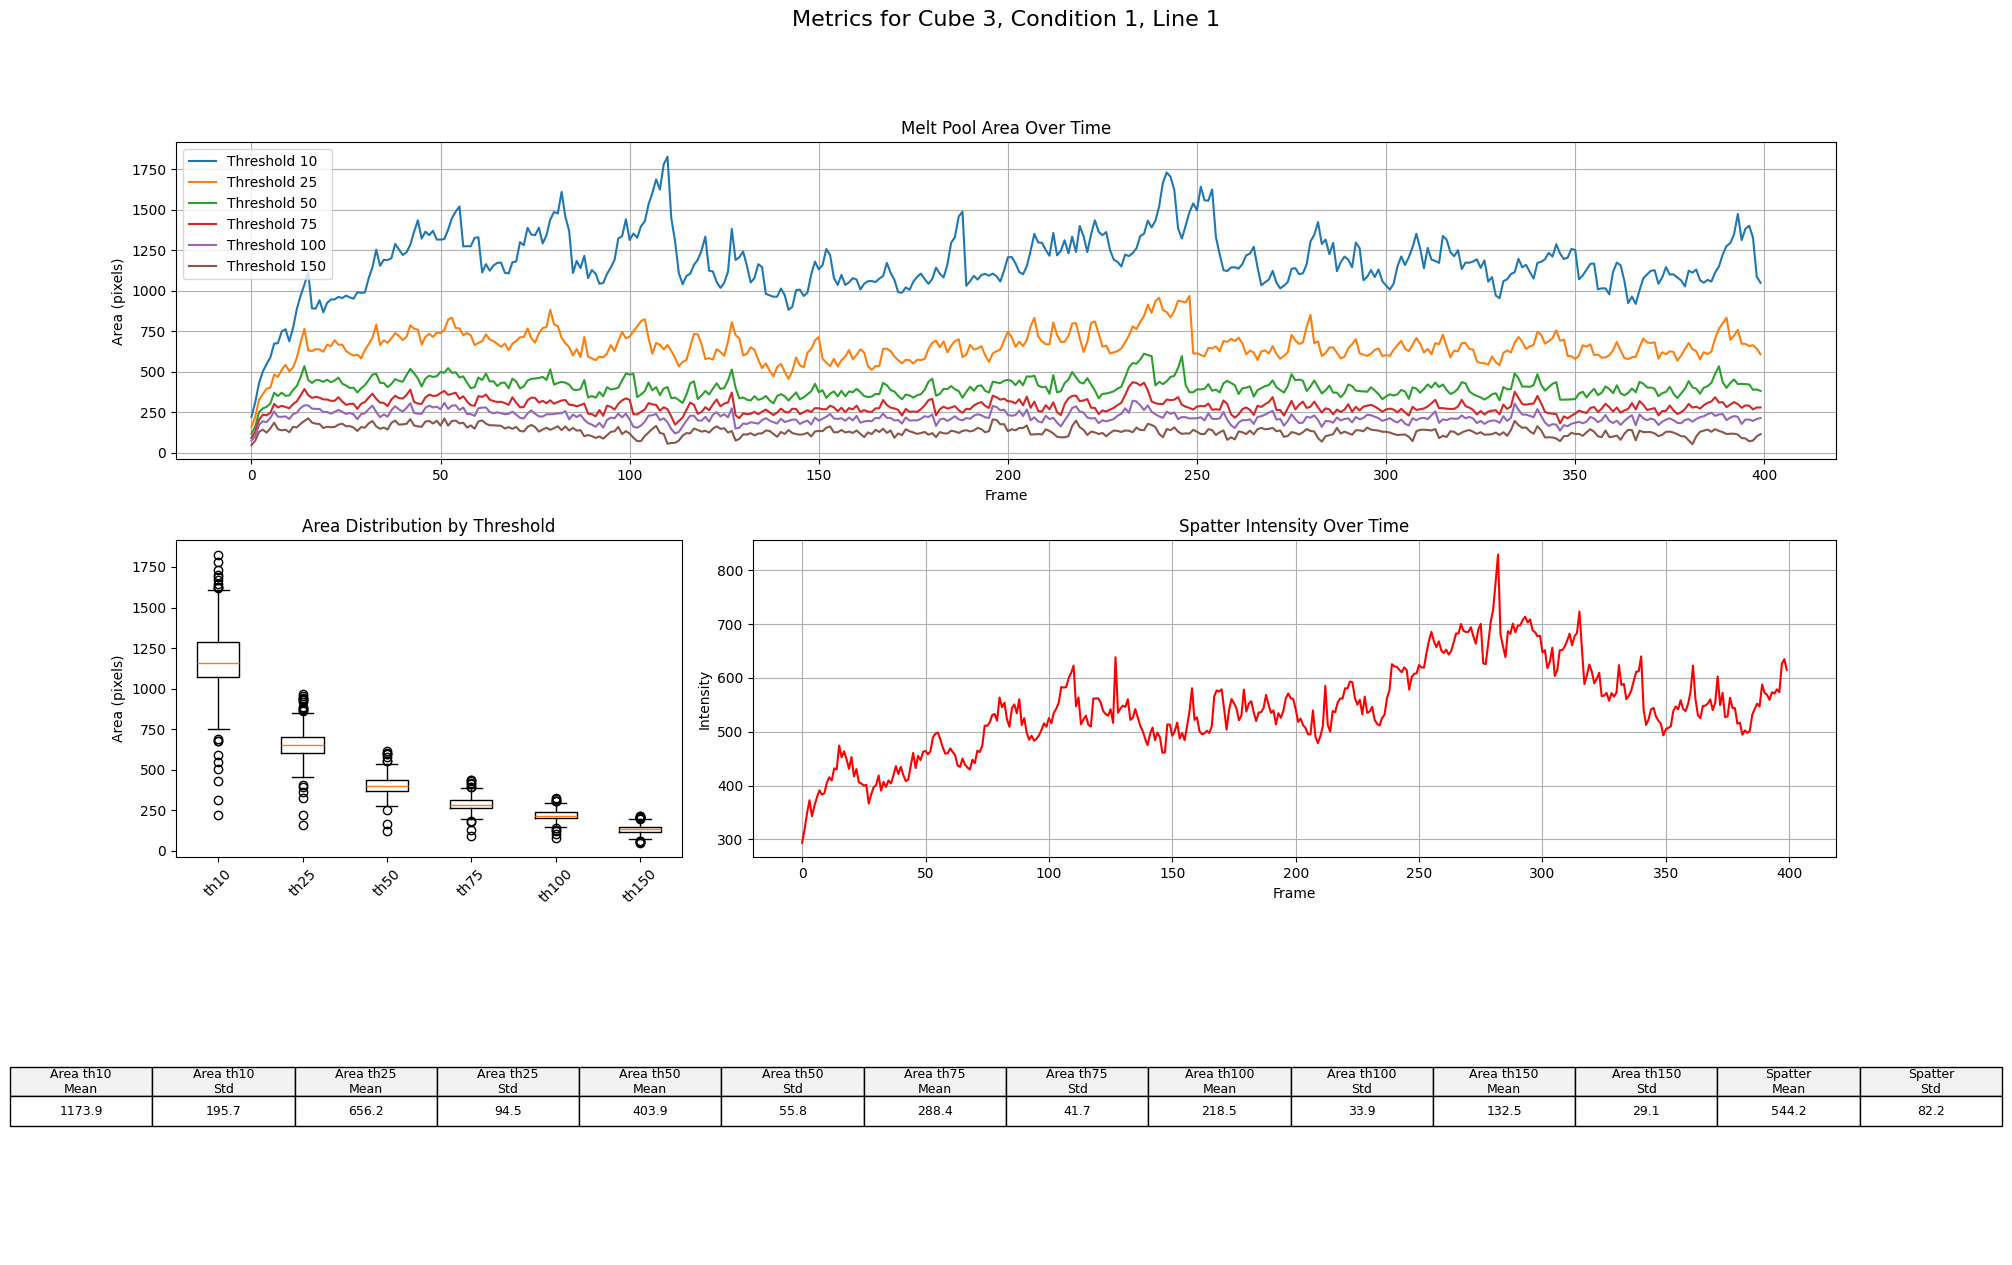

In [28]:
show_video_metrics(cube=3, condition=1, line=1)

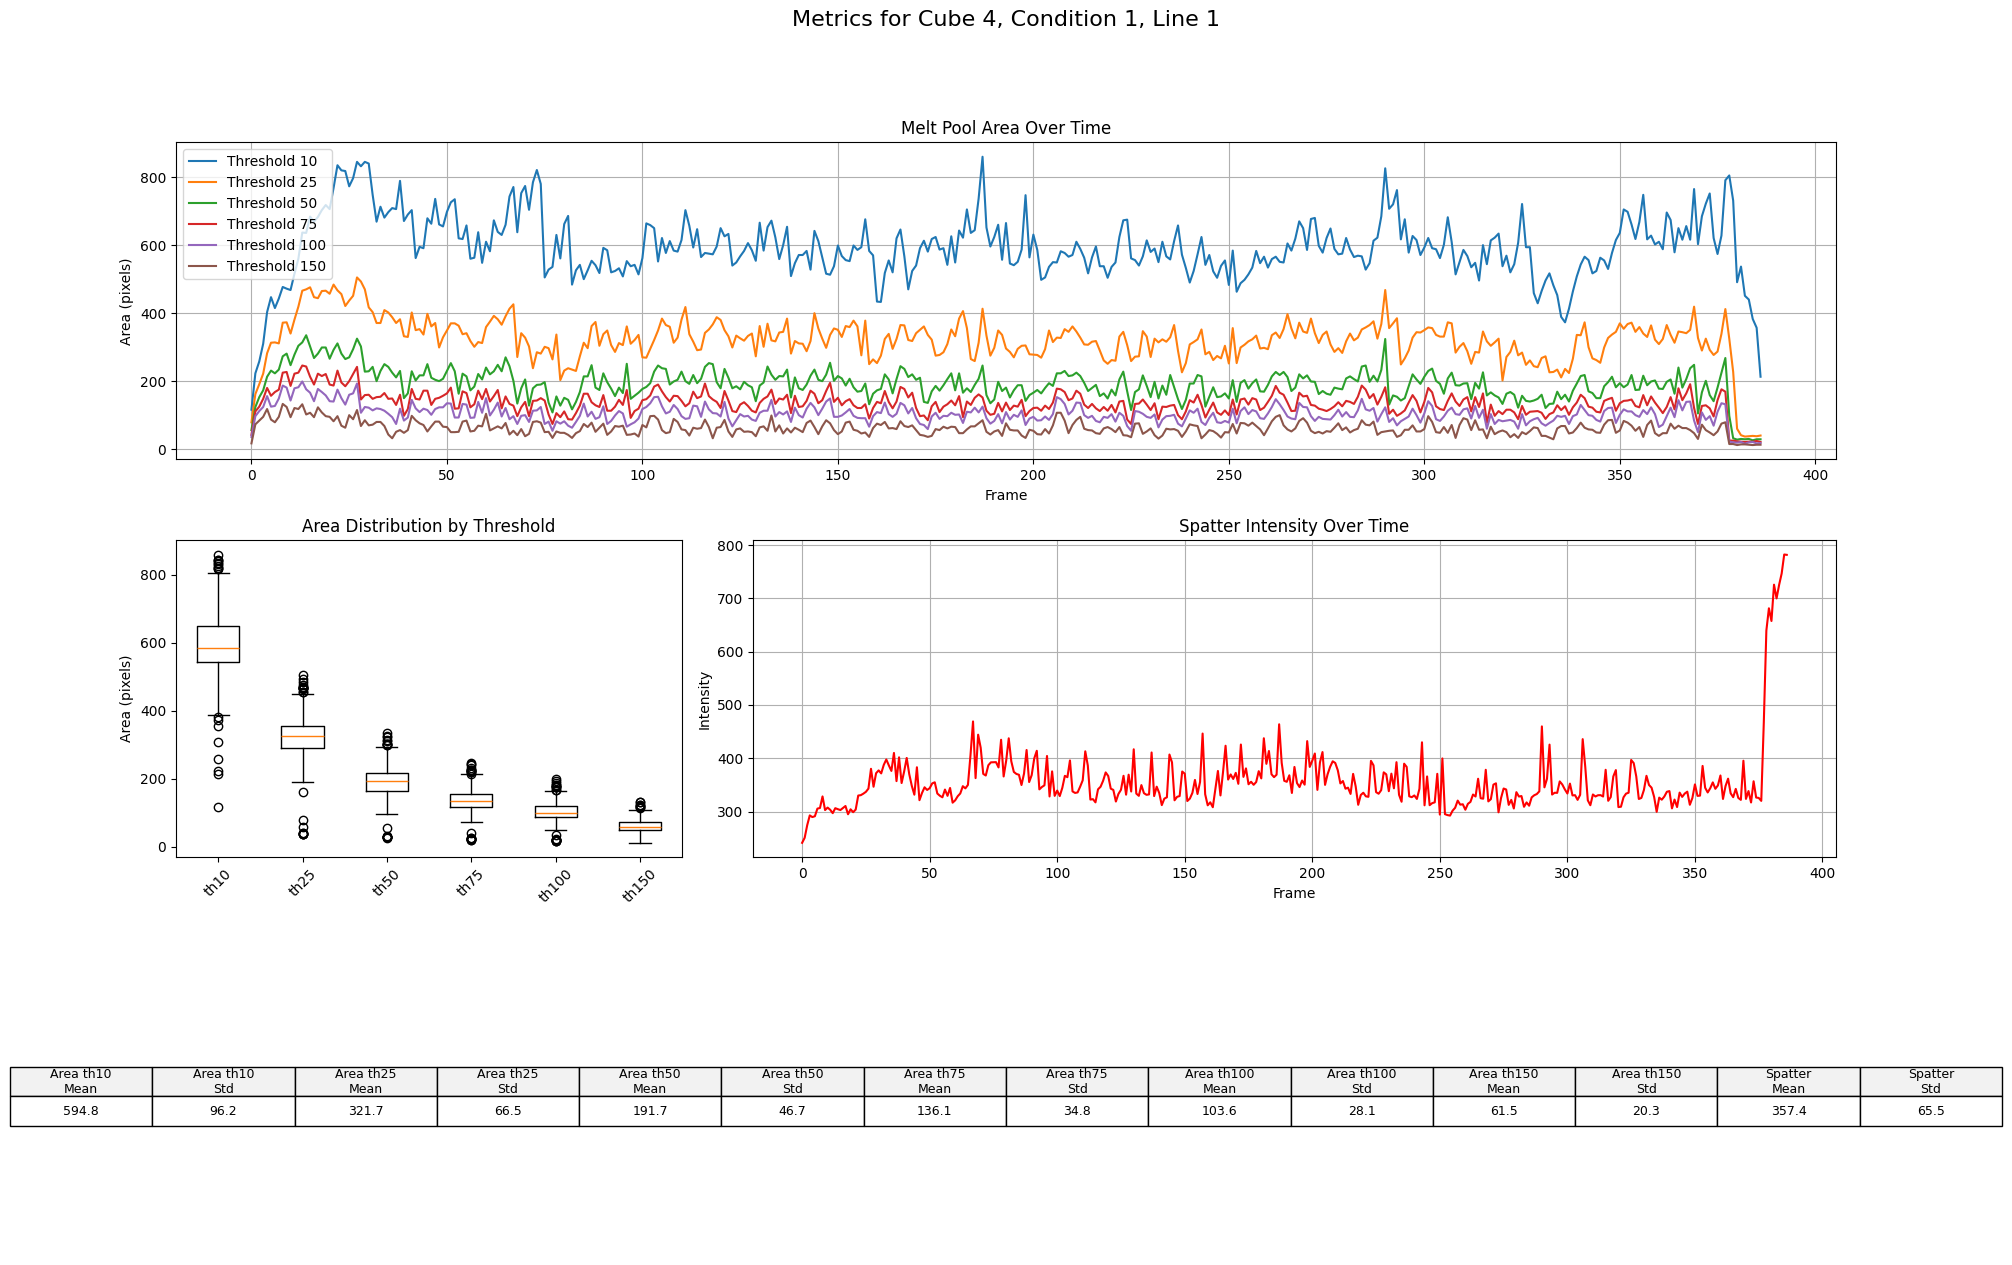

In [29]:
show_video_metrics(cube=4, condition=1, line=1)